In [0]:
import imutils
import numpy as np
import dlib
import cv2
from imutils import face_utils
from google.colab.patches import cv2_imshow #beacause cv2.imshoow is disabled in colab
from collections import OrderedDict
import pandas as pd

In [0]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')

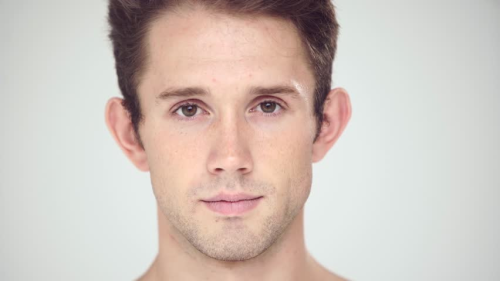

In [86]:
image_file='/content/1.jpg'
dims=(500,500)
image = cv2.imread(image_file)  #read the imagefile
image = imutils.resize(image, width=500) #resizing the image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #converting the image int gray

test= image.copy()

cv2_imshow(image)    
cv2.waitKey(0)
cv2.destroyAllWindows()

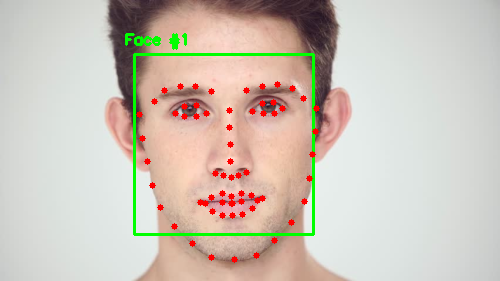

In [87]:
rects = detector(image)  #Detect the face in the image

for (i,rect) in enumerate(rects):  #loop over the face detections

  shape = predictor(gray , rect)  #Determines the facial landmarks
  shape = face_utils.shape_to_np(shape)

  (x,y,w,h) = face_utils.rect_to_bb(rect) 
  cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)  #Draw the bounding box across the face
  cv2.putText(image,"Face #{}".format(i+1),(x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2) #Puts the text at the location mentioned


  for(x,y) in shape:     #Loop over the x-y co-ordinates and draw them on the image
    cv2.circle(image,(x,y),3,(0,0,255),-1)

cv2_imshow(image)  #Output image with facial landmarks
cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
file = pd.DataFrame(shape)  
file.to_csv('face_landmarks',index=False)  #Saving the Landmarks array coordinates

In [89]:
data = pd.read_csv('face_landmarks')
data.head()

,0,1
0,139,114
1,142,138
2,147,161
3,152,185
4,160,207


In [90]:
print(data.shape)

(68, 2)


#Generate a curve using jaw lines

In [0]:
#Indexes
facial_landmarks_index = OrderedDict([("mouth", (48, 68)),
	                                    ("right_eyebrow", (17, 22)),
                                    	("left_eyebrow", (22, 27)),
	                                    ("right_eye", (36, 42)),
	                                    ("left_eye", (42, 48)),
	                                    ("nose", (27, 35)),
                                    	("jaw", (0, 17))
])

In [0]:
def visualise_landmarks(test, shape, alpha):

    output=test.copy()
    overlay= test.copy()


    (i,j) = facial_landmarks_index["jaw"]  #coordinates for only jaw
    points = shape[i:j]

    for k in range(1,len(points)):
        x= tuple(points[k-1])
        y= tuple(points[k])
        cv2.line(overlay,x,y,(0,0,255),2)   #Draws the line between (x,y) coordinates
      
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)  #Applying the transparent overlay
      
    return cv2_imshow(output)   #Final output



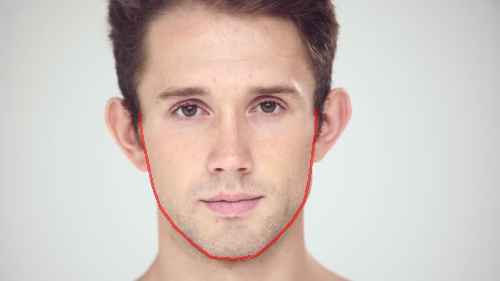

In [93]:
visualise_landmarks(test, shape, alpha=0.50)
